<a href="https://colab.research.google.com/github/shantanu-workspace/Bootcamp-Git/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

/tmp/ipython-input-940962347.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-940962347.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

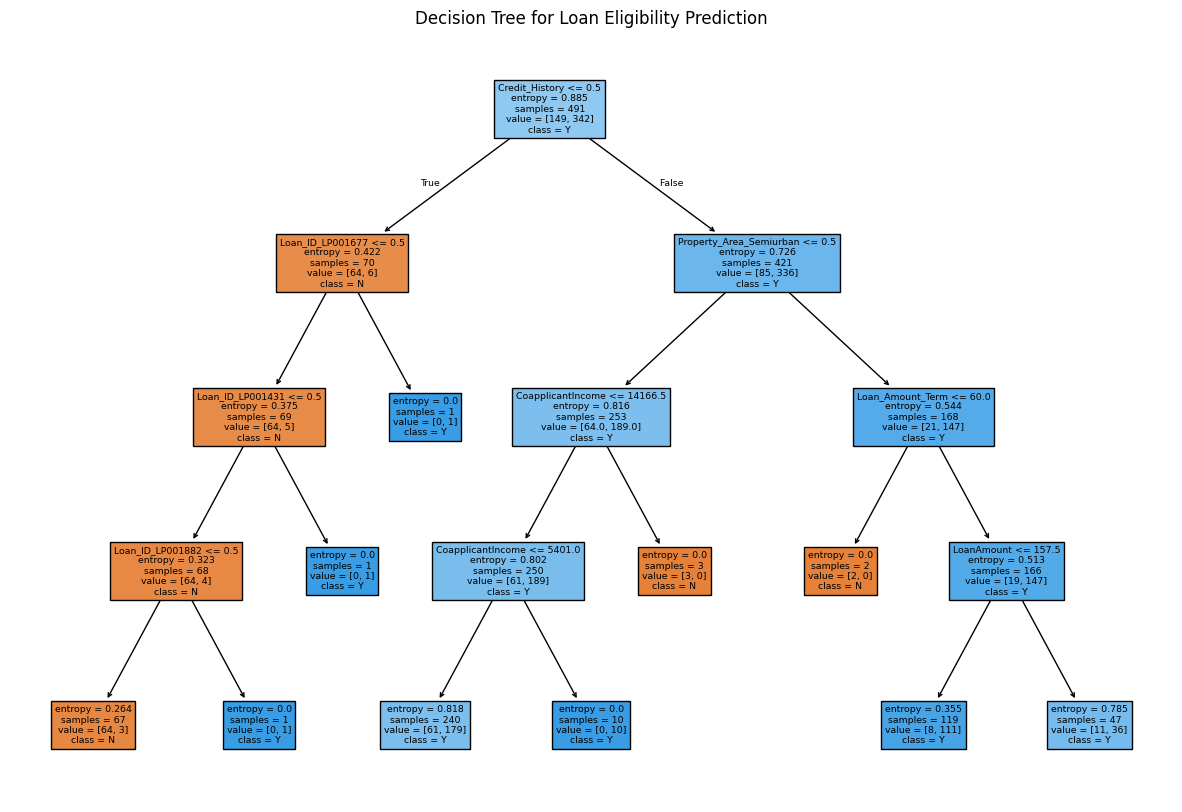

In [ ]:
# -------------------------------------------------------
# DECISION TREE CLASSIFIER: LOAN ELIGIBILITY PREDICTION
# -------------------------------------------------------

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("madfhantr.csv")

# Step 3: Display first few rows
print("First 5 rows of dataset:")
print(data.head())

# Step 4: Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 5: Fill or drop missing values
# (For simplicity, fill with most frequent values)
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Step 6: Encode categorical variables
# Convert text (like Gender, Married, etc.) to numeric
data_encoded = pd.get_dummies(data, drop_first=True)

# Step 7: Define features (X) and target (y)
# Assuming 'Loan_Status' is the target column
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]

# Step 8: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Create and train the Decision Tree model
model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["N", "Y"])
plt.title("Decision Tree for Loan Eligibility Prediction")
plt.show()


First 5 rows of dataset:
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1

Missing values in each column:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

Model Evaluation:
Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75        99
           1       0.57      0.82      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154



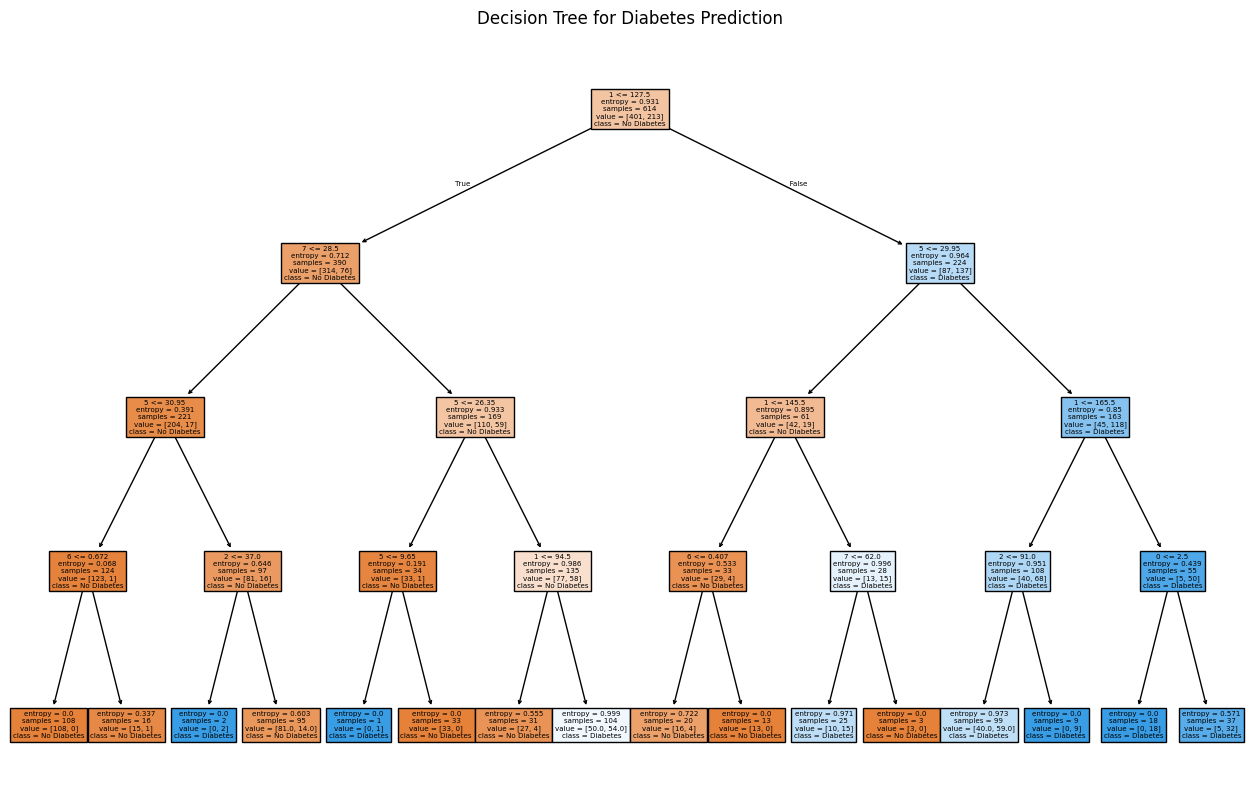


--- Random Sample Test ---
Sample Input:
 0     2.000
1    91.000
2    62.000
3     0.000
4     0.000
5    27.300
6     0.525
7    22.000
Name: 513, dtype: float64
Actual Outcome: No Diabetes
Predicted Outcome: No Diabetes


In [ ]:
# ---------------------------------------------------------
# DECISION TREE CLASSIFIER - PIMA INDIANS DIABETES DATASET
# ---------------------------------------------------------

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Step 2: Load the Dataset
data = pd.read_csv("pima-indians-diabetes.csv", header=None, sep=',', skiprows=9)

# Step 3: Display first few rows
print("First 5 rows of dataset:")
print(data.head())

# Step 4: Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 5: Define Features and Target
# The last column usually represents the target (Outcome)
X = data.iloc[:, :-1]   # all columns except last (features)
y = data.iloc[:, -1]    # last column (target)

# Step 6: Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and Train the Decision Tree Model
model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree for Diabetes Prediction")
plt.show()

